In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Import the dataset
df = pd.read_csv('Cardekho-raw-dataset.csv')
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [3]:
# Check the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [4]:
# Check the shape of the dataset
df.shape

(15411, 13)

In [5]:
# Check statistics of numerical columns
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
# Check unique values of the 'brand' column
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Ford', 'Renault', 'Mini', 'Mercedes-Benz',
       'Toyota', 'Volkswagen', 'Honda', 'Mahindra', 'Datsun', 'Tata',
       'Kia', 'BMW', 'Audi', 'Land Rover', 'Jaguar', 'MG', 'Isuzu',
       'Porsche', 'Skoda', 'Volvo', 'Lexus', 'Jeep', 'Maserati',
       'Bentley', 'Nissan', 'ISUZU', 'Ferrari', 'Mercedes-AMG',
       'Rolls-Royce', 'Force'], dtype=object)

In [7]:
# Check value counts of the 'brand' column
df['brand'].value_counts()

brand
Maruti           4992
Hyundai          2982
Honda            1485
Mahindra         1011
Toyota            793
Ford              790
Volkswagen        620
Renault           536
BMW               439
Tata              430
Mercedes-Benz     337
Skoda             334
Audi              192
Datsun            170
Jaguar             59
Land Rover         51
Jeep               41
Kia                32
Porsche            21
Volvo              20
MG                 19
Mini               17
Nissan             11
Lexus              10
Isuzu               8
Bentley             3
Maserati            2
ISUZU               2
Ferrari             1
Mercedes-AMG        1
Rolls-Royce         1
Force               1
Name: count, dtype: int64

In [8]:
# Check value counts of the 'car_name' column
df['car_name'].value_counts()

car_name
Hyundai i20              906
Maruti Swift Dzire       890
Maruti Swift             781
Maruti Alto              778
Honda City               757
                        ... 
Mercedes-AMG C             1
Rolls-Royce Ghost          1
Maserati Quattroporte      1
Isuzu MUX                  1
Force Gurkha               1
Name: count, Length: 121, dtype: int64

In [9]:
# Normalize the fuel_type based on it's value_counts
df['fuel_type'].value_counts(normalize=True)*100

fuel_type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

In [31]:
# Check the mean of the mileage column
round(float(df['mileage'].mean()),2)

19.7

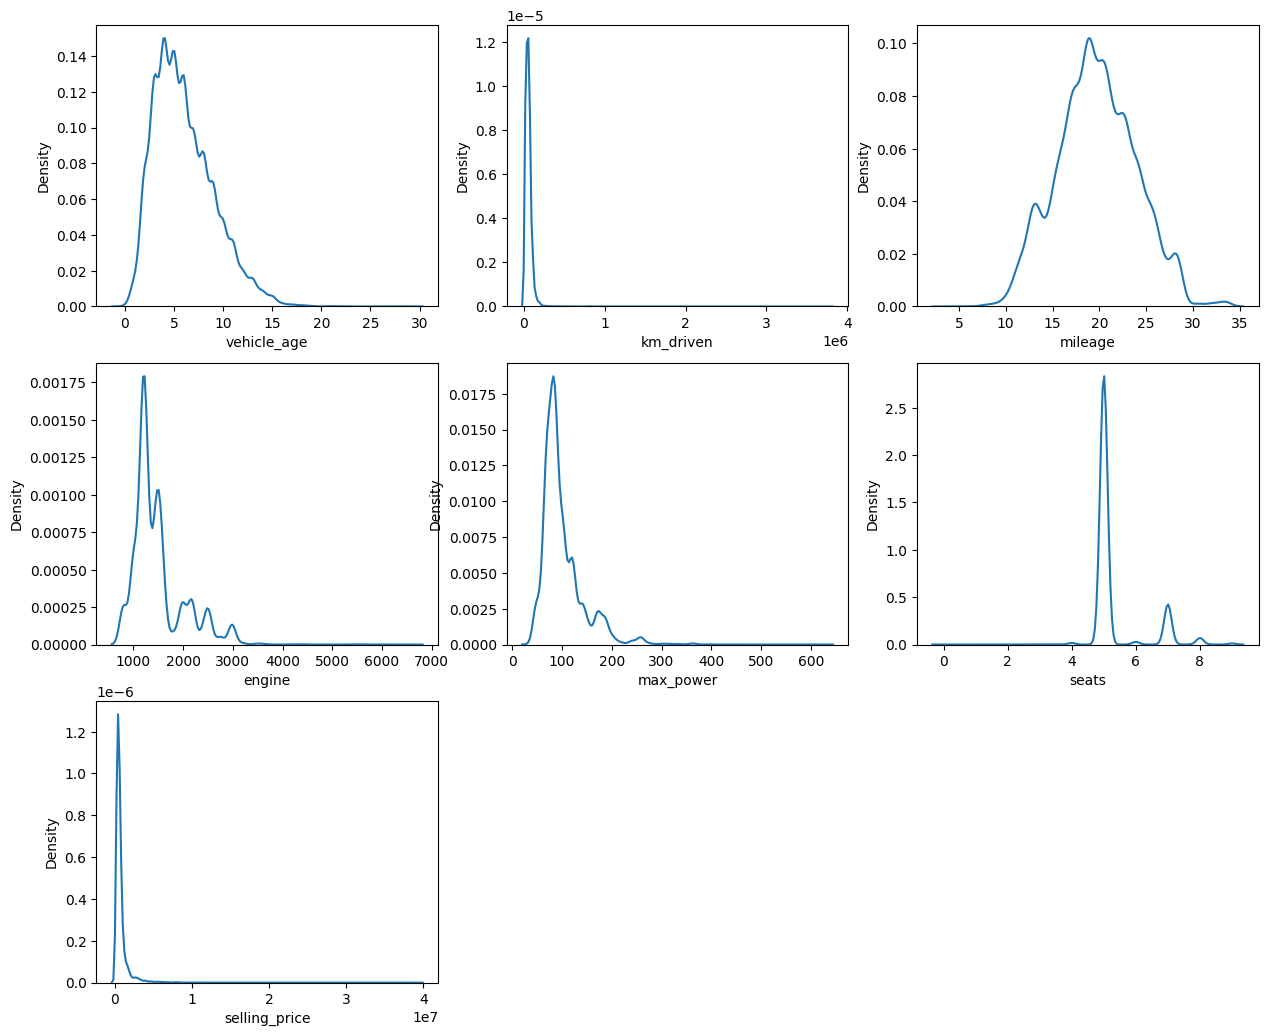

In [11]:
# Plot the density graphs of each of the numerical columns
num_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
plt.figure(figsize=(15, 30))
for i in range(len(num_columns)):
    plt.subplot(7, 3, i+1) 
    sns.kdeplot(data = df[num_columns[i]])

plt.show()

<h2>Overall Insights</h2>

<h3>Right-Skewed Variables:</h3>
<p>Variables like <strong>km_driven</strong>, <strong>selling_price</strong>, and <strong>max_power</strong> show strong right skewness, indicating a dominance of lower or typical values with a few outliers at the higher end. These variables may require transformation (e.g., log or square root) if used for modeling.</p>

<h3>Concentrated Distributions:</h3>
<p><strong>Seats</strong> and <strong>vehicle_age</strong> are highly concentrated around typical values (e.g., 5 seats, 0-10 years). This suggests standard consumer preferences for newer vehicles and compact/mid-sized cars.</p>

<h3>Distinct Vehicle Segments:</h3>
<p>The multimodal nature of <strong>engine</strong> and the broad range of <strong>max_power</strong> suggest that the dataset includes a mix of vehicle classes (e.g., compact, SUV, performance).</p>

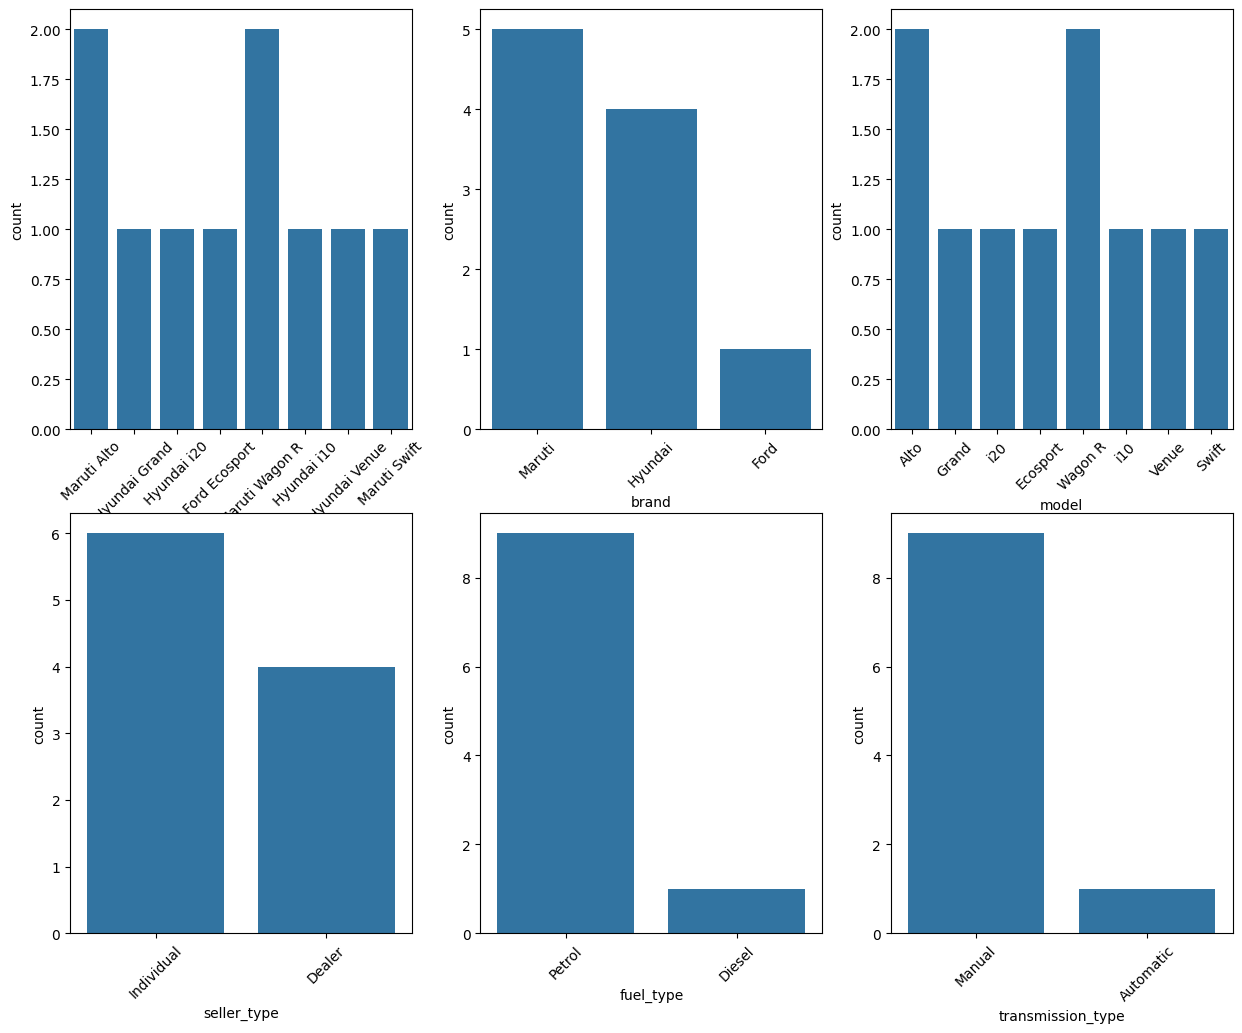

In [13]:
# Plot the countplots of each of the categorical columns
cat_columns = ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(15, 12))
for i in range(len(cat_columns)):
    plt.subplot(2, 3, i+1)
    plt.xticks(rotation = 45)
    sns.countplot(x = df[cat_columns[i]].head(10))

plt.show()

<h2>Insights</h2>

<ul>
<li>The dataset skews toward <strong>manual transmission</strong> and <strong>petrol-fueled</strong> cars sold by individuals.</li>
<li><strong>Maruti</strong> is the dominant brand, with the <strong>Maruti Alto</strong> and <strong>Hyundai Grand</strong> leading among models.</li>
<li><strong>Diesel cars</strong> and <strong>automatic transmissions</strong> are underrepresented, potentially indicating limited availability or demand in the dataset.</li>
</ul>

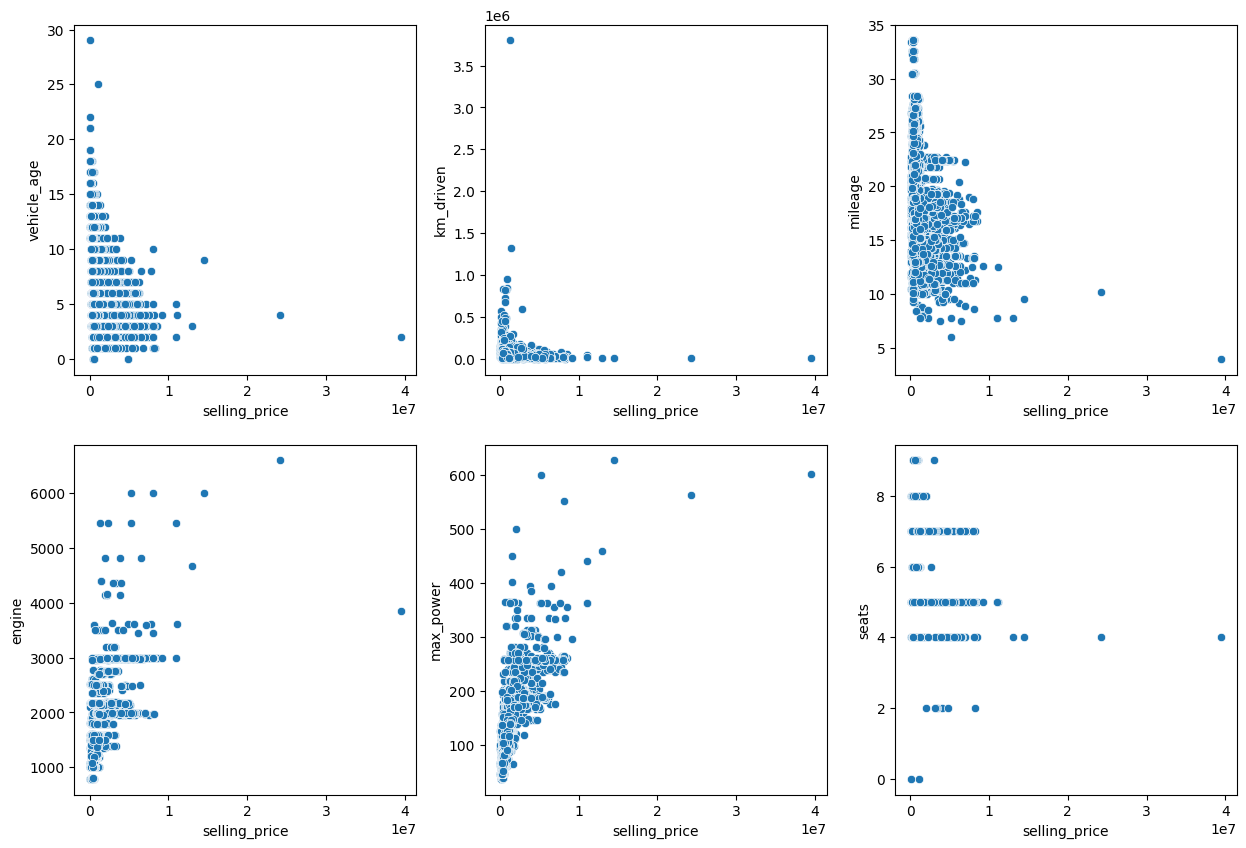

In [14]:
# Plot the relationship of each variable with the selling price (Target variable)
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

plt.figure(figsize=(15, 10))
for i in range(len(numerical_columns)):
    plt.subplot(2, 3, i+1) 
    sns.scatterplot(data = df, x = 'selling_price', y = numerical_columns[i])

plt.show()

<h2>Interpretation of the Scatterplots</h2>

<h3>1. Vehicle Age vs Selling Price</h3>
<p><strong>Observation:</strong> Older vehicles tend to have lower selling prices, indicating an inverse relationship.</p>
<p><strong>Outliers:</strong> Some older vehicles show unusually high selling prices.</p>

<h3>2. Kilometers Driven vs Selling Price</h3>
<p><strong>Observation:</strong> Cars with fewer kilometers driven are priced higher, while cars with high mileage are clustered at lower prices.</p>
<p><strong>Clusters:</strong> There’s a noticeable cluster at low prices and low mileage.</p>

<h3>3. Mileage vs Selling Price</h3>
<p><strong>Observation:</strong> No strong correlation is visible. However, cars with lower mileage seem to cluster around average selling prices.</p>

<h3>4. Engine vs Selling Price</h3>
<p><strong>Observation:</strong> A positive relationship is visible: cars with larger engine capacities tend to have higher prices.</p>

<h3>5. Max Power vs Selling Price</h3>
<p><strong>Observation:</strong> A positive trend is visible: higher power correlates with higher selling prices.</p>
<p><strong>Outliers:</strong> Some extreme outliers are present with very high power values.</p>

<h3>6. Seats vs Selling Price</h3>
<p><strong>Observation:</strong> No clear relationship is visible. Most cars have 4 or 5 seats, but prices don’t vary significantly based on seating capacity.</p>

In [15]:
# Multi-variate analysis - to check the correlation between all the combination of numerical features
num_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','selling_price']
df[num_columns].corr()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

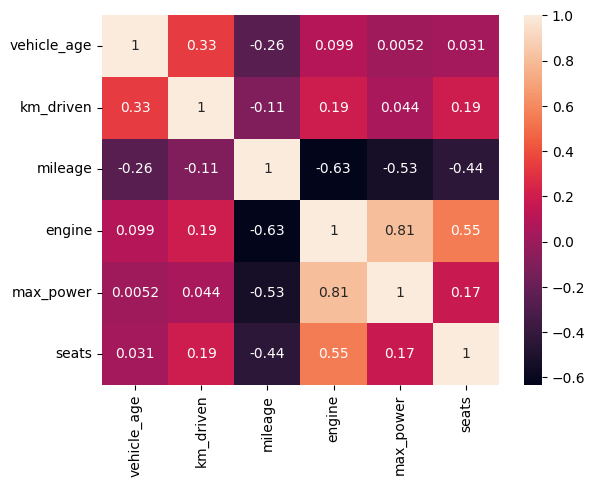

In [16]:
# Plot the heatmap of the correlation between each of the numerical features
sns.heatmap(data = df[numerical_columns].corr(), annot=True)

<h2>Insights</h2>
<h3>The Strongest Relationships:</h3>
<ul>
<li><strong>Engine vs. Max Power (0.81):</strong> Strongly linked, as expected for vehicle specifications.</li>
<li><strong>Engine vs. Mileage (-0.63):</strong> Indicates a trade-off between performance (engine size) and efficiency (mileage).</li>
</ul>

<h3>The Weakest Relationships:</h3>
<ul>
<li><strong>Vehicle Age vs. Max Power (0.0052):</strong> No notable effect of age on power.</li>
<li><strong>Km Driven vs. Max Power (0.044):</strong> Distance traveled doesn't significantly impact the power of the vehicle.</li>
</ul>

In [17]:
# Create a copy of the dataframe to model the data
model_data = df.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [18]:
# Drop the noise in the data (unwanted columns)
model_data.drop(labels=['car_name', 'brand', 'model', 'seller_type'], axis=1, inplace=True)

In [19]:
model_data.head()

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000


In [20]:
# Convert the categorical variables into a set of binary(0,1) 
model_data = pd.get_dummies(model_data, dtype = int)
model_data.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,550000,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,215000,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,226000,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,570000,0,1,0,0,0,0,1


In [21]:
# Drop the column of selling_price from the independent variable
X = model_data.drop('selling_price', axis=1)
X.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0,0,0,0,1,0,1
1,5,20000,18.90,1197,82.00,5,0,0,0,0,1,0,1
2,11,60000,17.00,1197,80.00,5,0,0,0,0,1,0,1
3,9,37000,20.92,998,67.10,5,0,0,0,0,1,0,1
4,6,30000,22.77,1498,98.59,5,0,1,0,0,0,0,1


In [22]:
# For getting the target variable we will just have selling_price
Y = model_data['selling_price']
Y.head()

0    120000
1    550000
2    215000
3    226000
4    570000
Name: selling_price, dtype: int64

In [23]:
# Divide data into Train & Test data
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.2)
train_X
# 80% data goes to Train & 20% goes to Test

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
290,9,98000,12.07,2967,241.40,7,0,1,0,0,0,1,0
12985,8,70000,18.50,1197,82.90,5,0,0,0,0,1,0,1
10354,6,55000,16.77,2967,246.74,4,0,1,0,0,0,1,0
10148,2,22000,26.80,1462,103.00,7,1,0,0,0,0,0,1
12841,7,20353,20.50,1598,103.50,5,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5952,5,32615,23.90,1582,126.20,5,0,1,0,0,0,0,1
5645,5,88185,24.70,1498,98.63,5,0,1,0,0,0,0,1
3772,4,70000,16.50,1493,70.00,7,0,1,0,0,0,0,1
15102,4,24000,15.80,1591,121.30,5,0,0,0,0,1,0,1


In [24]:
# Applying LinearRegression for training the model
Regressor = LinearRegression().fit(train_X,train_Y)
Regressor

LinearRegression()

In [25]:
# Getting the predictions
Prediction = Regressor.predict(test_X)
print(Prediction)
print(test_Y)

[ 473163.64121903 1265371.46618399  641829.57536378 ... 1316845.09338598
  245997.94301123  114996.6320497 ]
14088     400000
10875    1175000
6622      608000
7873      430000
8799      515000
          ...   
4817     1800000
13748     775000
1107      625000
6888      225000
7533      200000
Name: selling_price, Length: 3083, dtype: int64


In [26]:

test_X['predicted_sales_price'] = Prediction

test_X['actual_price'] = test_Y

# Calculate the difference between the predicted sales price and the actual price
test_X['difference'] = test_X['predicted_sales_price'] - test_X['actual_price']

# Display the predicted sales price, actual price and the difference
test_X[['predicted_sales_price', 'actual_price', 'difference']]

,predicted_sales_price,actual_price,difference
14088,4.731636e+05,400000,73163.641219
10875,1.265371e+06,1175000,90371.466184
6622,6.418296e+05,608000,33829.575364
7873,3.402794e+05,430000,-89720.559616
8799,6.822564e+05,515000,167256.449508
...,...,...,...
4817,2.013678e+06,1800000,213678.056555
13748,9.390962e+05,775000,164096.200223
1107,1.316845e+06,625000,691845.093386
6888,2.459979e+05,225000,20997.943011


In [47]:
# Calculate the root mean squared error for the prediction
mse = []
mse.append(mean_squared_error(y_true = test_Y, y_pred = Prediction))

rmse = []
rmse.append(np.sqrt(mse[0]))

print(f"The Root Mean Squared Error is : {rmse[0].round(2)}")

The Root Mean Squared Error is : 500685.55
